In [1]:
from model import FFNet, tv_model, ResBam
from learning import Learn, Selector, Metrics
from dataset import SKDS, TVDS, CDataset, ImageDatasetStats, AsTensor, Squeeze, DType

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray([1,2,3,4]), np.asarray(100), ['apple','dog']),
                2: (np.asarray([5,6,7,8]), np.asarray(200), ['orange','cat'])}
        print(boom)
        return data
    
ds_params = {'train_params': {'embed': [('fruit',2,8,False,False),
                                        ('pet',2,8,False,False)],
                              'embed_lookup': {'fruit': {'apple': 1,
                                                         'orange': 2},
                                               'pet': {'dog': 1,
                                                       'cat': 2}},
             'boom': 'bang'}}
    
d = Dummy(**ds_params['train_params'])
d[1]           

bang
CDataset created...


(array([1, 2, 3, 4]), array(100), [tensor(1), tensor(1)])

In [3]:
ds_params={'embed': [],
           'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3
#stddev: 73.7

TVDS created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.583059
epoch: 0, lr: 0.01
train loss: 675654.7106481482, val loss: 684444.5125
sk_train_log: 0, sk_val_log: 0
learning time: 0:00:07.346339
epoch: 10, lr: 0.01
train loss: 15210.67628761574, val loss: 18009.6962890625
sk_train_log: 0, sk_val_log: 0
test loss: 10202.4216796875
learning time: 0:00:11.737919
test sklean metric: 
0 



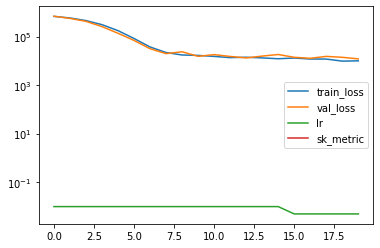

In [4]:
model_params = {'D_in': 256, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_regression',
                              'transform': None,
                              'target_transform': None,
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_params = {'report_interval': 10}                         
             
opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

SKDS created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.876279
epoch: 0, lr: 0.01
train loss: 1.3822718208089417, val loss: 1.346965140309827
sk_train_log: 0.5427768990751922, sk_val_log: 0.5990452630257024
learning time: 0:00:13.996890
epoch: 4, lr: 0.01
train loss: 0.9251458441818153, val loss: 1.0259479366499802
sk_train_log: 0.8516260326456633, sk_val_log: 0.8165863203490704
learning time: 0:00:25.128400
epoch: 8, lr: 0.01
train loss: 0.8034380582662729, val loss: 1.0529022247626865
sk_train_log: 0.8892508283886322, sk_val_log: 0.8208876042334473
test loss: 1.04700210793265
learning time: 0:00:28.264255
test sklean metric: 
0.8240056208895209 



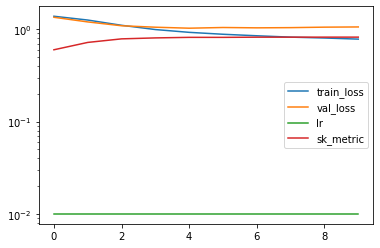

In [5]:
model_params = {'D_in': 256, 
                'H': 192, 
                'D_out': 4, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_classification',
                              'transform': transforms.Compose([AsTensor()]),
                              'target_transform': transforms.Compose([
                                                            DType('int64'),
                                                            AsTensor(),
                                                            Squeeze()]),
                              'sk_params': {'n_samples': 100000,
                                            'n_features': 256,
                                            'n_informative': 50,
                                            'n_clusters_per_class': 10,
                                            'flip_y': 0.05,
                                            'class_sep': 0.01,
                                            'n_classes': 4}}}
                                     
metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

Files already downloaded and verified
TVDS created...
Files already downloaded and verified
TVDS created...
TorchVision model resnet18 loaded...
learning time: 0:00:12.229013
epoch: 0, lr: 0.01
train loss: 2.347022841453552, val loss: 2.0580490020013626
sk_train_log: 0.6303748940029826, sk_val_log: 0.717163687813137
learning time: 0:00:24.104417
epoch: 1, lr: 0.01
train loss: 2.0271803708076477, val loss: 2.009629343786547
sk_train_log: 0.7205826090582771, sk_val_log: 0.7575491632668171
learning time: 0:00:36.023482
epoch: 2, lr: 0.01
train loss: 1.941030562877655, val loss: 1.9280632695844095
sk_train_log: 0.7540169582847167, sk_val_log: 0.7769814251312428
learning time: 0:00:47.940834
epoch: 3, lr: 0.01
train loss: 1.872293833255768, val loss: 1.8250464085609681
sk_train_log: 0.7749967129680105, sk_val_log: 0.7988606531388263
learning time: 0:00:59.898393
epoch: 4, lr: 0.01
train loss: 1.777162600517273, val loss: 1.7330664569331753
sk_train_log: 0.8011693691562083, sk_val_log: 0.818

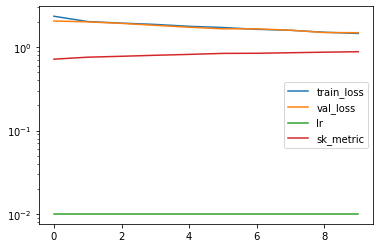

In [6]:
model_params = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

TVDS created...
TVDS created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:26.458181
epoch: 0, lr: 0.005
train loss: 1.9199226598739625, val loss: 1.8283339392754339
sk_train_log: 0.7642509698903557, sk_val_log: 0.7912434625971188
learning time: 0:00:51.605333
epoch: 1, lr: 0.005
train loss: 1.7580125951766967, val loss: 1.6576246407724196
sk_train_log: 0.8112473951566386, sk_val_log: 0.8372049858420219
learning time: 0:01:16.911295
epoch: 2, lr: 0.005
train loss: 1.6566095628738404, val loss: 1.647128124390879
sk_train_log: 0.8350150808482422, sk_val_log: 0.8382376835371721
learning time: 0:01:41.818254
epoch: 3, lr: 0.005
train loss: 1.566562403678894, val loss: 1.600776941545548
sk_train_log: 0.8543696406996227, sk_val_log: 0.84312693148289
learning time: 0:02:06.855083
epoch: 4, lr: 0.005
train loss: 1.5033120050430298, val loss: 1.5197318253978607
sk_train_log: 0.8673349372975826, sk_val_log: 0.8581555752211525
learning time: 0:02:32.153541
epoch: 5, lr: 0.005
tra

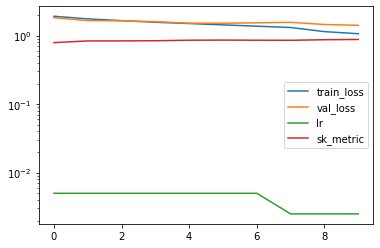

In [7]:
model_params = {'n_classes': 10,
                'residual': True,
                'in_channels': 3,
                'groups': 1,
                'bam': True,
                'dropout': [False,False,False,False,False],
               # 'act': None
               }


ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          ResBam, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)

TVDS created...
TVDS created...
TorchVision model resnext50_32x4d loaded...
learning time: 0:00:58.530814
epoch: 0, lr: 0.01
train loss: 2.7772140798568725, val loss: 2.090589531006352
sk_train_log: 0.6111489507377204, sk_val_log: 0.6919877740438217
learning time: 0:01:55.277910
epoch: 1, lr: 0.01
train loss: 2.0594844064712525, val loss: 2.085741450709681
sk_train_log: 0.7007074884824863, sk_val_log: 0.7274664940489295
learning time: 0:02:52.262075
epoch: 2, lr: 0.01
train loss: 1.9866933135986329, val loss: 1.9616269488488474
sk_train_log: 0.7322061859831921, sk_val_log: 0.7547413471441999
learning time: 0:03:49.261642
epoch: 3, lr: 0.01
train loss: 1.945827597618103, val loss: 1.982586806820285
sk_train_log: 0.7493108764433885, sk_val_log: 0.7584424781214064
learning time: 0:04:46.184780
epoch: 4, lr: 0.01
train loss: 1.879425232887268, val loss: 1.876022869540799
sk_train_log: 0.7712081938034067, sk_val_log: 0.7831122500164177
learning time: 0:05:44.398493
epoch: 5, lr: 0.01
train 

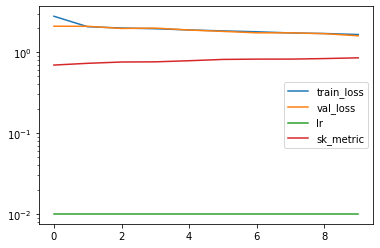

In [2]:
model_params = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)